In [1]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, ##要搜索的模型
                       params, ##要尝试的参数
                       error_score=0.)  ##如果报错，结果是0
    grid.fit(X, y) #拟合模型和参数
    # 性能指标
    print('best accuracy: {}'.format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print('best parameters:{}'.format(grid.best_params_))
    # 拟合的平均时间(秒)
    print('average time to fit (s): {}'.format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    ## 预测的平均时间
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [2]:
import numpy as np
import pandas as pd

np.random.seed(12345)

In [3]:
credit_card_default = pd.read_csv('data/credit_card_default.csv')

In [5]:
credit_card_default.shape

(30000, 24)

In [8]:
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [9]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
X = credit_card_default.drop('default payment next month', axis=1)

y = credit_card_default['default payment next month']

In [11]:
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
## 为网格搜索设置变量
## 先设置机器学习模型的参数

#逻辑回归
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}

#KNN
knn_params = {'n_neighbors':[1,3,5,7]}

#决策树
tree_params = {'max_depth':[None, 1,3,5,7]}

#随机森林
forest_params = {'n_estimators':[10,50,100], 'max_depth':[None, 1,3,5,7]}

In [14]:
##实例化机器学习模型
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [18]:
get_best_model_and_accuracy(lr, lr_params, X, y)

best accuracy: 0.7788333333333334
best parameters:{'C': 0.1, 'penalty': 'l2'}
average time to fit (s): 0.075
Average Time to Score (s):0.001


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
get_best_model_and_accuracy(knn, knn_params, X, y)

best accuracy: 0.7617333333333333
best parameters:{'n_neighbors': 7}
average time to fit (s): 0.031
Average Time to Score (s):0.472


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}

knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])

get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

print(knn_pipe_params)

best accuracy: 0.7993333333333333
best parameters:{'classifier__n_neighbors': 7}
average time to fit (s): 0.041
Average Time to Score (s):3.379
{'classifier__n_neighbors': [1, 3, 5, 7]}


In [20]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

best accuracy: 0.8206333333333333
best parameters:{'max_depth': 3}
average time to fit (s): 0.156
Average Time to Score (s):0.002


In [21]:
get_best_model_and_accuracy(forest, forest_params, X, y)

best accuracy: 0.8190999999999999
best parameters:{'max_depth': 7, 'n_estimators': 100}
average time to fit (s): 1.067
Average Time to Score (s):0.026


In [22]:
###基于统计的特征选择
#1.皮尔逊相关系数
#2.假设检验
#3.卡方检验
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


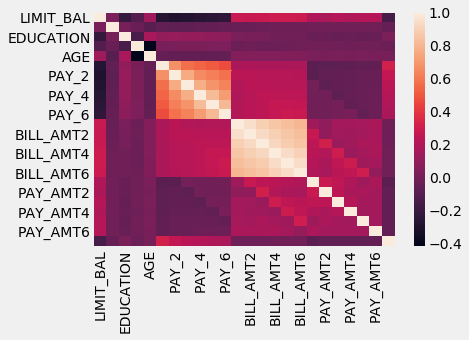

In [23]:
import seaborn as sns
import matplotlib.style as style

style.use('fivethirtyeight')
sns.heatmap(credit_card_default.corr())

In [24]:
#只有特征和响应(结果)的相关性
credit_card_default.corr()['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [29]:
#提取特征和响应(结果)的相关性>0.1的值
(credit_card_default.corr()['default payment next month'].abs() > .2).sum()

6

In [30]:
highly_correlated_features = credit_card_default.columns[credit_card_default.corr()['default payment next month'].abs() > .2]

In [31]:
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [33]:
highly_correlated_features = highly_correlated_features.drop('default payment next month')

In [34]:
X_subsetted = X[highly_correlated_features]

In [35]:
get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y)

best accuracy: 0.8213333333333332
best parameters:{'max_depth': 3}
average time to fit (s): 0.008
Average Time to Score (s):0.001


In [36]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # 保存响应变量
        self.response = response
        #保存阈值
        self.threshold = threshold
        #初始化一个变量，存放要保留的特征名
        self.cols_to_keep = cols_to_keep
    
    def transform(self, X):
        # 转换会选择合适的列
        
        return X[self.cols_to_keep]
    
    def fit(self, X, *_):
        #创建新的df，存放特征和响应
        df = pd.concat([X, self.response], axis=1)
        #保存高于阈值的列的名称
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        # 只保留X的列，删除响应变量
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self

In [37]:
ccc = CustomCorrelationChooser(threshold=.2, response=y)

In [38]:
ccc.fit(X)
ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [39]:
ccc.transform(X).head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0


In [40]:
from copy import deepcopy

ccc = CustomCorrelationChooser(response=y)

ccc_pipe = Pipeline([('correlation_select', ccc), ('classifier', d_tree)])

tree_pipe_params = {'classifier__max_depth': [None, 1,3,5,7,9,11,13,15,17,19,21]}

ccc_pipe_params = deepcopy(tree_pipe_params)

##更新决策树的参数选择
ccc_pipe_params.update({'correlation_select__threshold': [0, 0.1,0.2,0.3]})

get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

best accuracy: 0.8207333333333333
best parameters:{'classifier__max_depth': 3, 'correlation_select__threshold': 0.2}
average time to fit (s): 0.099
Average Time to Score (s):0.002


In [41]:
#2 使用假设检验

#####基于模型进行特征选择(5/22，太累了，不想看了，复习到这里记得回去重新看一遍)